##問題發想

某些學生的學測模擬考成績如下：

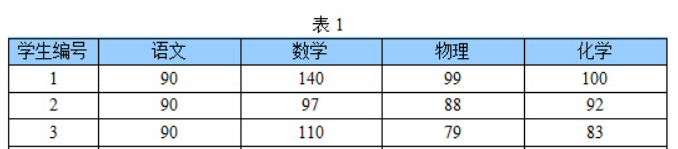

請問應先加強那一科，才能在學測有好成績判斷三個學生的成績

數學，物理，化學這三門課的成績構成了這組資料的主成分

那麼這個表我們能一眼看出來嗎？

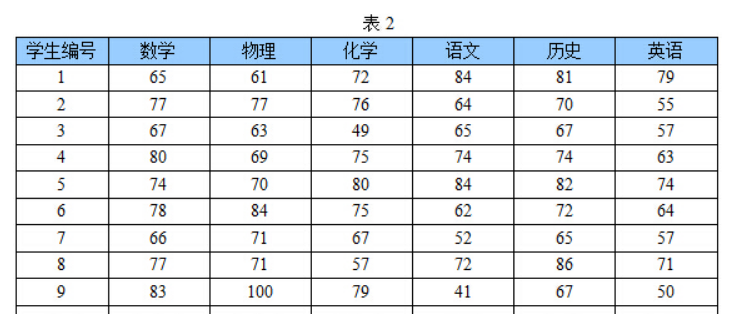


如果上面的資料表達如下圖，也許你就能換一個觀察角度找出主成分

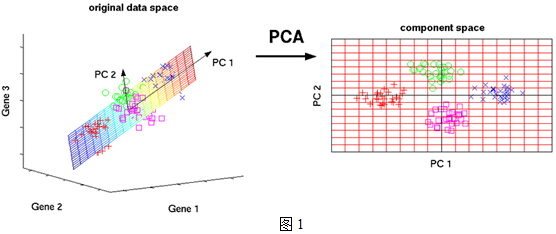


##主成分分析（PCA）
主成分分析（PCA）是一種基於變數協方差矩陣對資料進行壓縮降維，去噪的有效方法

[降維示意影片](https://leemeng.tw/images/pca/DotProductAsProjectTo1D.mp4)

如何降維?

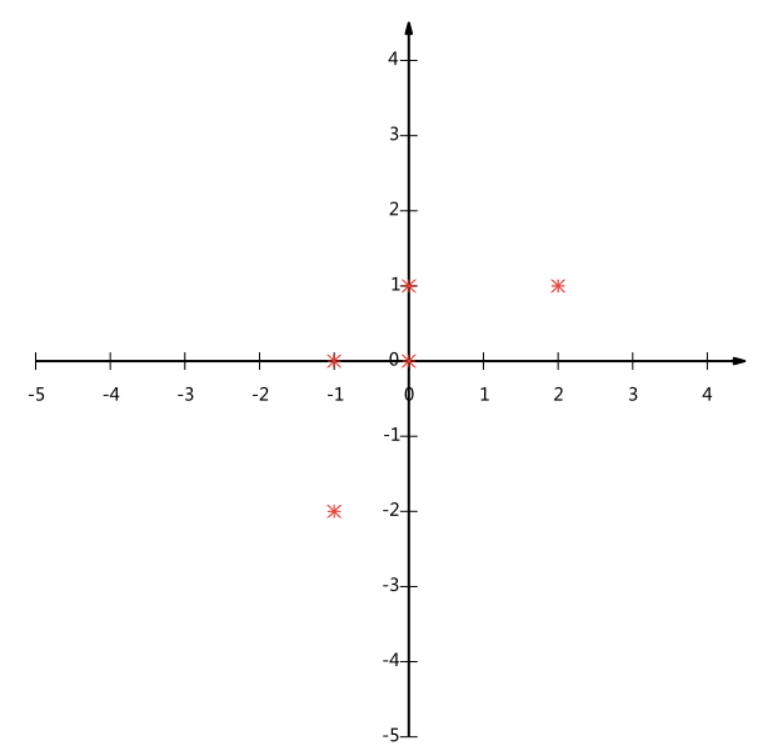

##PCA降維的演算法步驟

1.   對數據做標準化，使數據在相同區間較好比較
2.   建立covariance matrix(協方差矩陣)
3.   分解covariance matrix為特徵向量及特徵值
4.   選擇值最大的k個特徵值對應的特徵向量
5.   利用k特徵向量建立投影矩陣






##PCA降維的計算

　1，原始資料集矩陣X

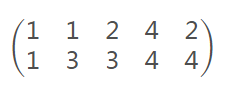



2，求均值後：

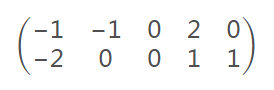

3，再求協方差矩陣：

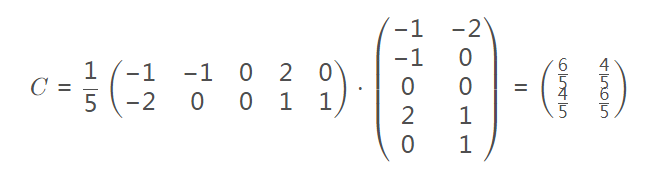

4，特徵值：(特徵方程式的解法，可參閱課本227頁)


---



---



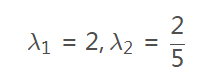

5，對應的特徵向量：

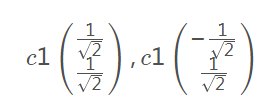

6.選擇較大的特徵向量：

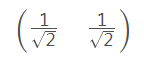

7.執行PCA變換：

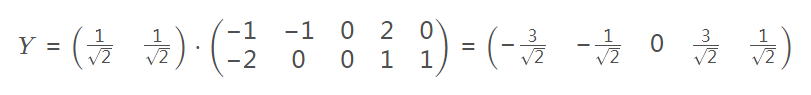

##iris資料集的PCA降維

###讀取iris資料

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


###資料標準化

In [2]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(iris_df)
X = pd.DataFrame(x,columns = iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


###PCA降維

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [4]:
P = pca.fit_transform(X)

In [5]:
P_df = pd.DataFrame(P,columns=['pca1','pca2'])
P_df

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


###降維後的資料

In [6]:
y = pd.DataFrame(iris.target,columns=['type'])

In [8]:
reduceDF = pd.concat([P_df,y],axis=1)
reduceDF

,pca1,pca2,type
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


###降維資料分佈圖

In [9]:
import matplotlib.pyplot as plt


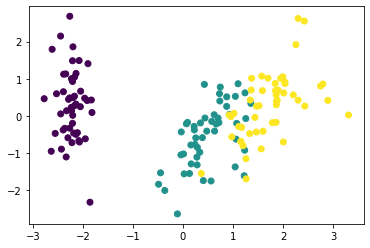

In [10]:
plt.scatter(reduceDF['pca1'],reduceDF['pca2'],c=reduceDF['type'])

###PCA評估


In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

###PCA矩陣

In [12]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])